In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
import itertools
import scipy.stats

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?


In [2]:
norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered@assays$RNA@data.csv')
norm_data = norm_data.T


In [3]:
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Cell_replicate_name_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered (1).csv',index_col = 0)
cell_identity

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,Species,Cells_Nuclei,Species_Type,Annotation,CellNames
Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell_1,7907,3206,13415,3313,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAACCTGAGAGCTTCT
Maize_Cell1_AAAGCAAAGAACTGTA,Maize_Cell_1,8702,3189,13712,3231,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAAGCAAAGAACTGTA
Maize_Cell1_AAATGCCAGTAGCCGA,Maize_Cell_1,13018,4202,14150,4202,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCAGTAGCCGA
Maize_Cell1_AAATGCCCAATCTACG,Maize_Cell_1,12346,3915,13974,3913,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCCAATCTACG
Maize_Cell1_AACTGGTAGTGACTCT,Maize_Cell_1,6317,2726,13679,3038,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AACTGGTAGTGACTCT
...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Set_Nuclei_2,2585,1560,2583,1558,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACATTCAAGACGAC-1
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Set_Nuclei_2,2639,1549,2639,1549,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACGGGTCTTTCAGT-1
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Set_Nuclei_2,2516,1547,2516,1547,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGAACACAGTTGAAA-1
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Set_Nuclei_2,2570,1540,2569,1539,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGTCCACACTGCGTG-1


In [4]:
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']


In [5]:
norm_data.obs['Species'] = 'unassigned'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Maize')] = 'Maize'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Set')] = 'Millet'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Sorg')] = 'Sorghum'


In [6]:
norm_data.obs.value_counts('Species')

Species
Millet     13166
Sorghum    11130
Maize       6903
dtype: int64

In [7]:
norm_data['Maize_Cell1_AAACCTGAGAGCTTCT'].X[:,4000]

ArrayView([0.], dtype=float32)

In [8]:
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'

In [9]:
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cluster and Type'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cluster and Type'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cluster and Type'] + ' Sorghum'

In [10]:
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAAGCAAAGAACTGTA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAATGCCAGTAGCCGA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAATGCCCAATCTACG,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AACTGGTAGTGACTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl


In [11]:
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']

In [12]:
norm_data.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type,Type and Species
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAAGCAAAGAACTGTA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAATGCCAGTAGCCGA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAATGCCCAATCTACG,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
Maize_Cell1_AACTGGTAGTGACTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell,Maize Cell
...,...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl,Millet Nucl


In [13]:
fully_seperated_data = norm_data.copy()

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


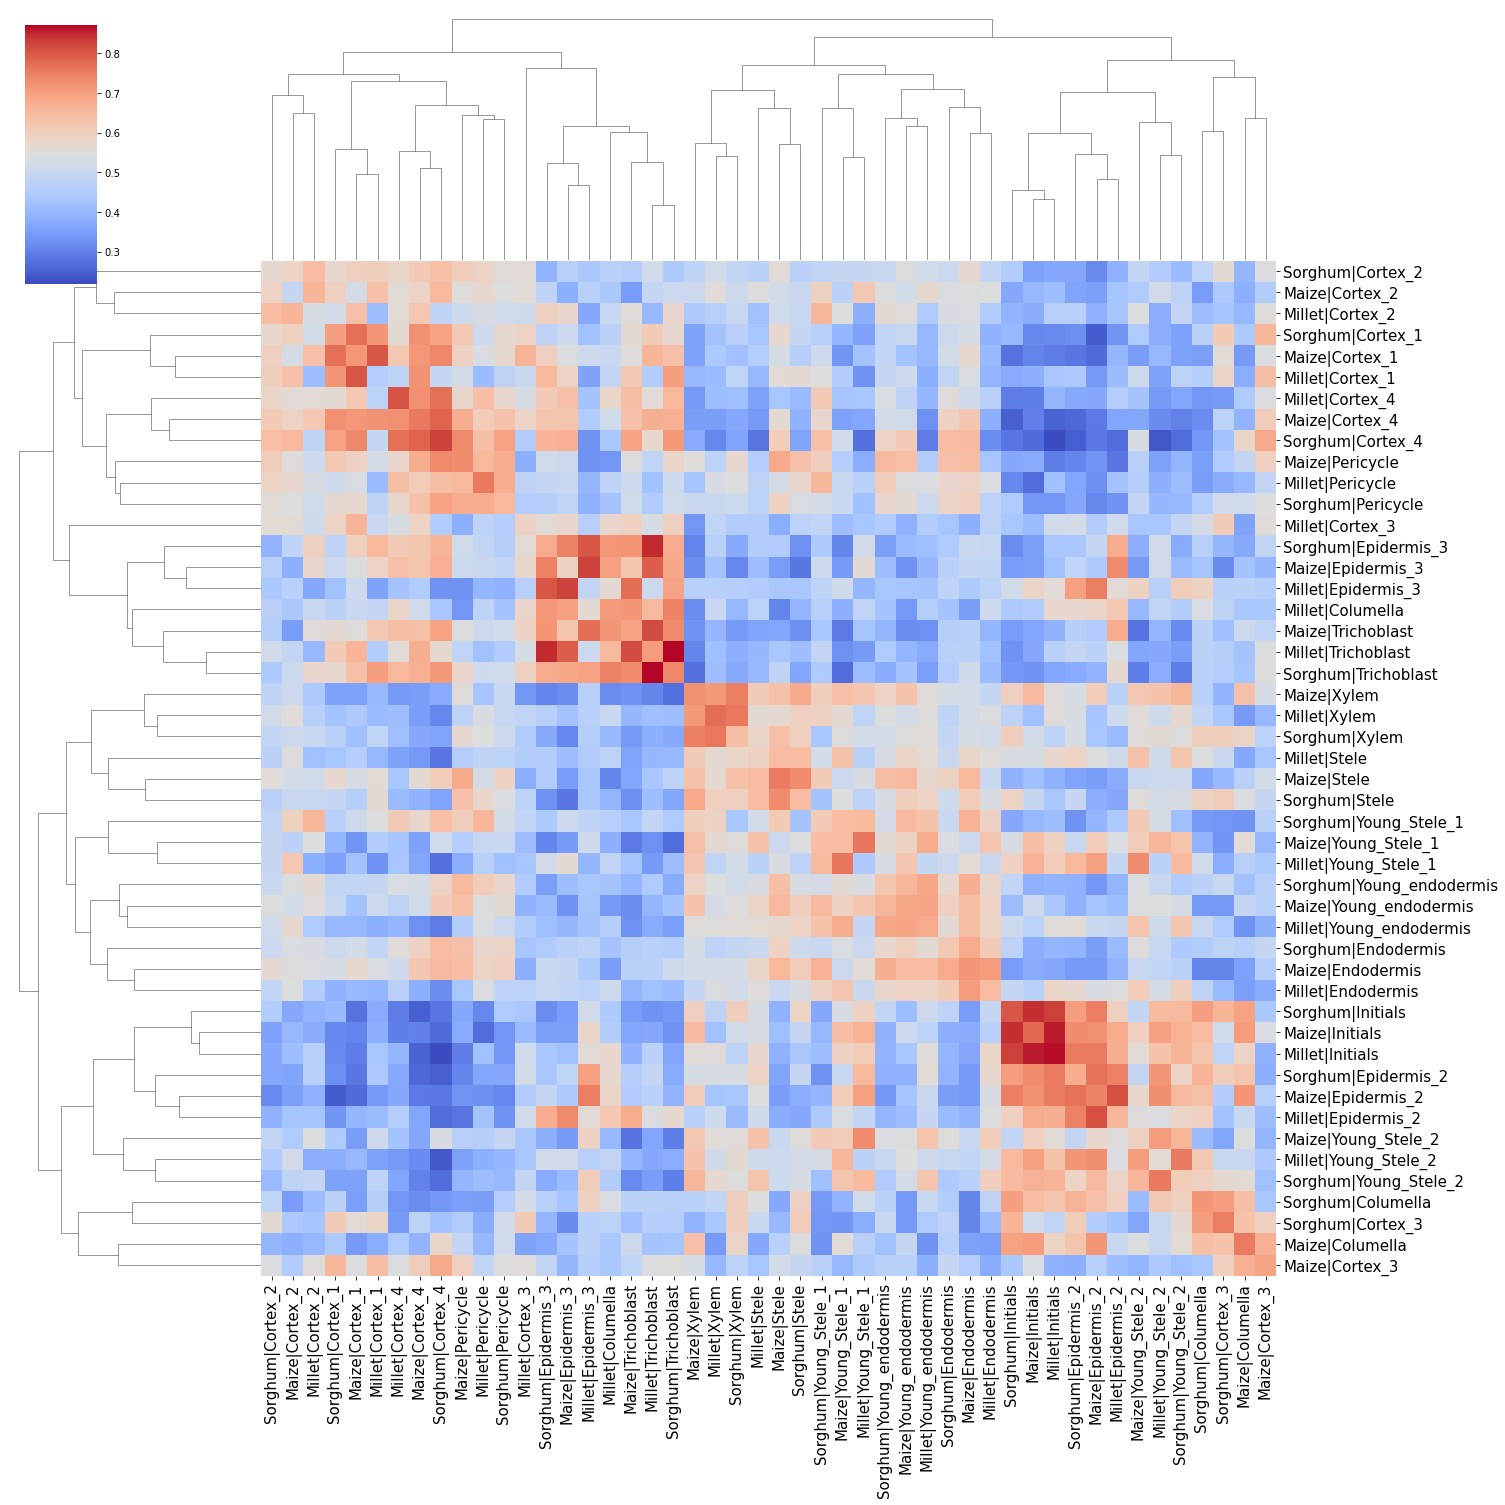

In [14]:
pymn.variableGenes(norm_data,study_col = 'Species')
pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

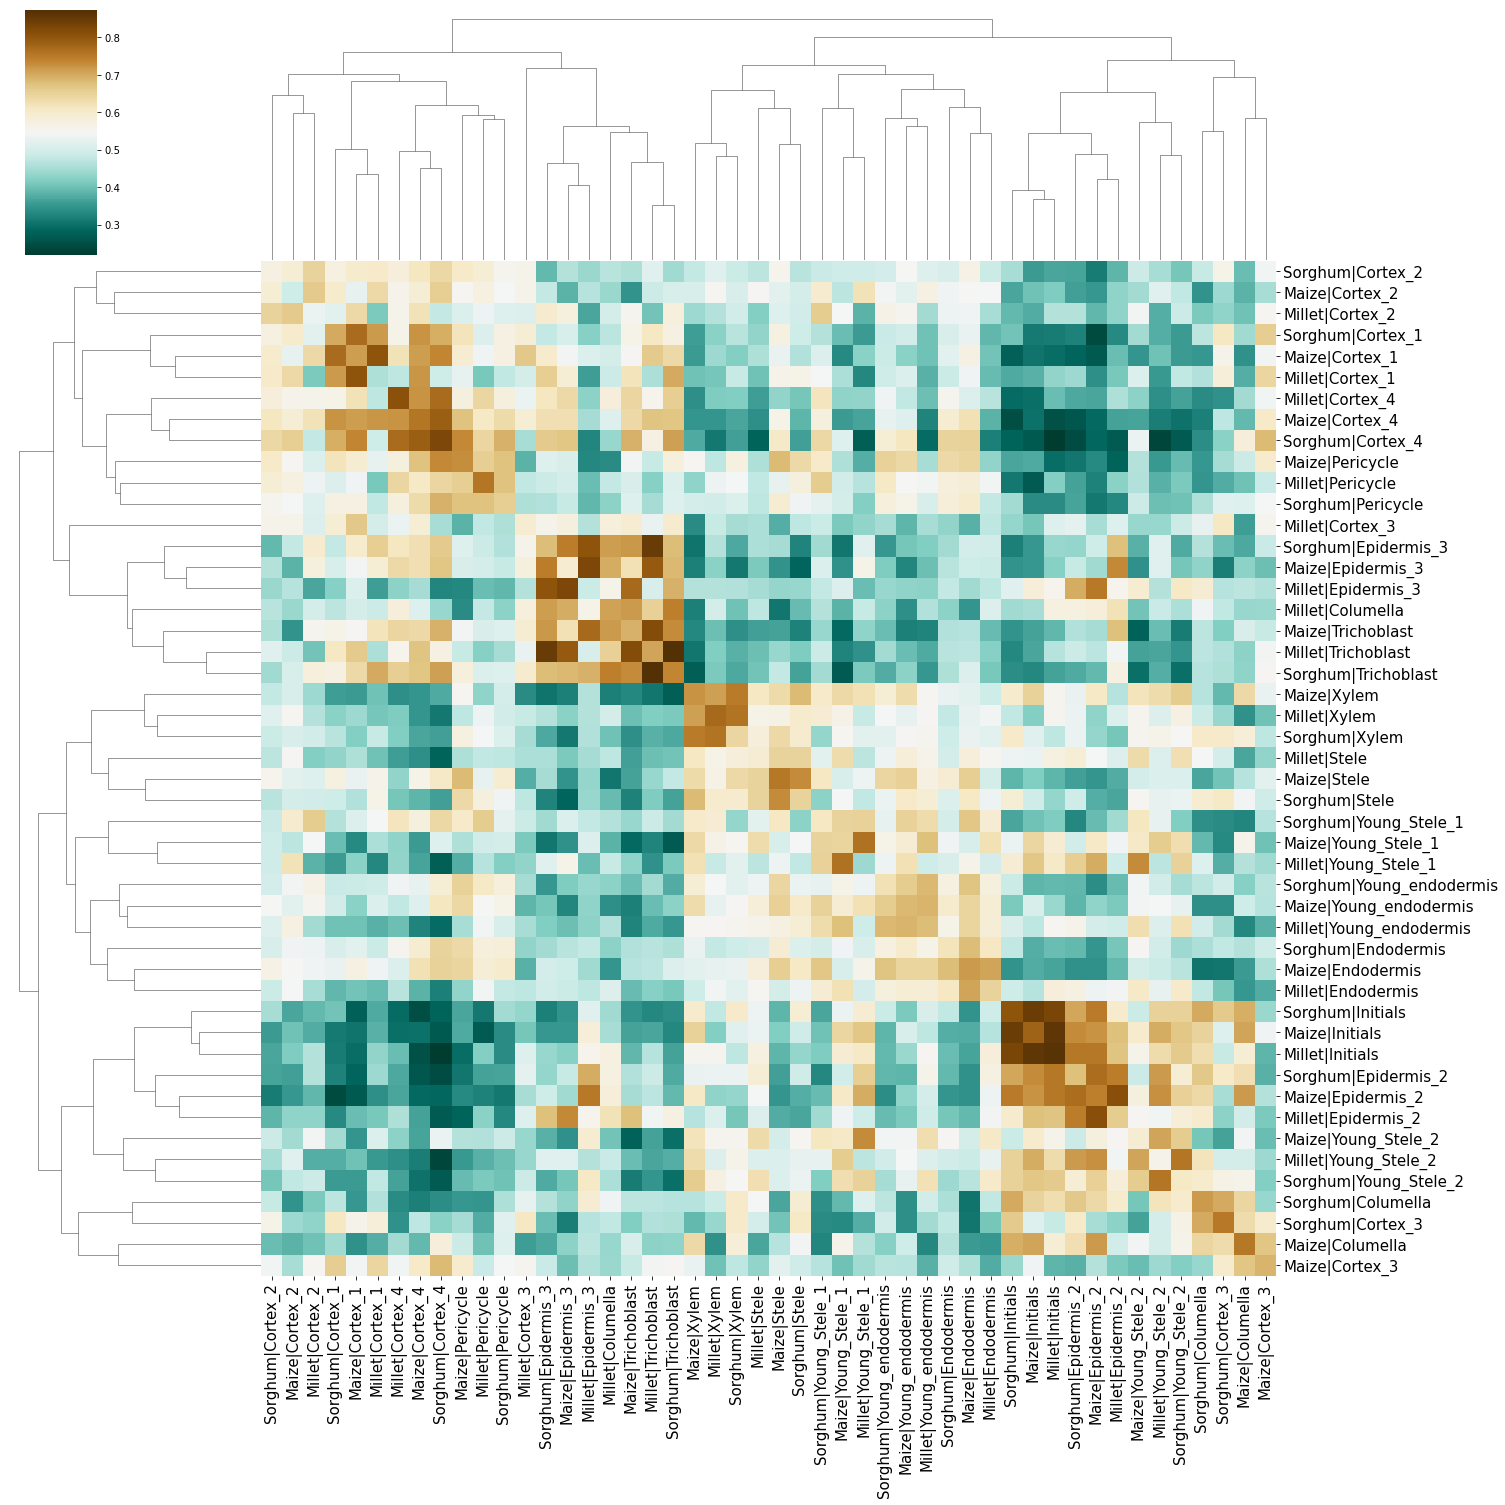

In [15]:
pymn.variableGenes(norm_data,study_col = 'Species')
pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation', compute_p= True)
g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'BrBG_r',fontsize = 15,show = False,cbar_pos = (0.02,0.82,0.05,0.17))
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/Blue_green_brown_new_data_only_across_species.pdf', dpi = 1000)

In [16]:
norm_data.uns['MetaNeighborUS_pval']

,Maize|Columella,Maize|Cortex_1,Maize|Cortex_2,Maize|Cortex_3,Maize|Cortex_4,Maize|Endodermis,Maize|Epidermis_2,Maize|Epidermis_3,Maize|Initials,Maize|Pericycle,...,Sorghum|Epidermis_2,Sorghum|Epidermis_3,Sorghum|Initials,Sorghum|Pericycle,Sorghum|Stele,Sorghum|Trichoblast,Sorghum|Xylem,Sorghum|Young_Stele_1,Sorghum|Young_Stele_2,Sorghum|Young_endodermis
Maize|Columella,2.870508e-39,1.946720e-55,3.444655e-21,1.494975e-05,3.156482e-12,8.326535e-11,4.616042e-64,3.233688e-03,2.165862e-33,6.144948e-02,...,3.742083e-15,9.475109e-34,3.382809e-60,1.697616e-11,2.700130e-01,3.528755e-20,3.127473e-03,1.543579e-54,3.302586e-01,8.495501e-08
Maize|Cortex_1,1.290972e-11,1.427568e-74,4.131860e-01,1.267348e-04,1.672820e-45,3.470867e-07,3.771636e-86,8.371934e-02,2.771369e-27,7.351785e-26,...,1.870897e-144,1.089639e-03,8.843334e-97,3.576941e-08,3.350125e-01,4.696372e-16,9.559724e-03,1.423084e-03,1.014250e-24,4.511149e-01
Maize|Cortex_2,5.902096e-10,3.094551e-07,2.431085e-01,8.287642e-02,6.749893e-23,2.262842e-14,5.987385e-61,2.184724e-26,3.466927e-12,1.076983e-40,...,2.547325e-115,4.845241e-01,1.015329e-58,2.549561e-10,1.040539e-01,4.871572e-02,4.422830e-01,8.680471e-53,9.042160e-04,1.165944e-05
Maize|Cortex_3,2.267414e-48,1.219210e-03,3.078896e-21,6.037529e-43,1.031950e-18,3.593895e-02,3.890599e-08,3.860728e-29,1.739161e-04,2.796591e-47,...,2.398475e-118,5.498521e-03,5.309823e-19,1.640500e-12,4.957194e-01,6.052608e-05,2.714805e-04,9.942848e-03,1.749703e-28,2.570439e-01
Maize|Cortex_4,3.869157e-07,1.328172e-49,4.283422e-01,2.598681e-04,5.470082e-47,1.108794e-06,3.996454e-69,1.118286e-01,2.784835e-29,7.233551e-33,...,6.904039e-128,6.408783e-05,2.294505e-85,4.617044e-13,2.637799e-02,2.952712e-19,2.147761e-04,3.223296e-02,3.298598e-34,2.495604e-01
Maize|Endodermis,1.204084e-21,1.541520e-07,9.690289e-03,4.728474e-05,3.586943e-22,3.417002e-40,9.599209e-81,5.705962e-07,5.584783e-26,9.748465e-42,...,5.991615e-104,3.769007e-02,5.237750e-60,1.492979e-20,5.850016e-10,3.490766e-02,1.528903e-02,5.774695e-57,5.078364e-03,1.765525e-21
Maize|Epidermis_2,4.394495e-29,5.799199e-77,3.737981e-13,3.434655e-01,6.003187e-28,6.782077e-06,2.826842e-81,6.216131e-02,2.332215e-38,1.864887e-11,...,9.371919e-189,3.653119e-02,2.243261e-105,8.201192e-24,9.408457e-03,1.271000e-09,6.439118e-02,5.872174e-04,7.460078e-45,1.214809e-01
Maize|Epidermis_3,3.531308e-07,4.447847e-21,8.740488e-05,3.899455e-01,1.910905e-38,1.195772e-05,1.801019e-11,1.045341e-07,1.710349e-24,2.377162e-18,...,1.240161e-07,3.969145e-26,2.046488e-76,1.919315e-04,1.427542e-06,5.880496e-52,1.336713e-05,1.700600e-20,3.336576e-07,4.757249e-01
Maize|Initials,8.204196e-22,8.773633e-58,6.236147e-09,3.586803e-01,1.709681e-27,5.721158e-04,3.454888e-58,2.302189e-10,5.415485e-52,1.014638e-08,...,3.318155e-106,1.244416e-09,1.041311e-186,3.865236e-22,3.216984e-02,6.032414e-33,1.458829e-01,1.866325e-01,7.939861e-39,2.678583e-01
Maize|Pericycle,4.515486e-01,2.075280e-07,2.697279e-06,4.617284e-02,4.588971e-31,1.379413e-14,2.830918e-88,7.122804e-08,7.382532e-23,3.021904e-79,...,9.523380e-149,3.522559e-01,1.396534e-27,1.340629e-35,2.250458e-08,7.200341e-05,1.772938e-01,3.416501e-08,2.622420e-26,8.369352e-08


In [17]:
meta_neightbor_as_panda = norm_data.uns['MetaNeighborUS']
meta_neightbor_as_panda = meta_neightbor_as_panda.where(np.triu(np.ones(meta_neightbor_as_panda.shape)).astype(bool))
meta_neightbor_as_panda = meta_neightbor_as_panda.stack().reset_index()
meta_neightbor_as_panda.columns = ['Cluster 1','Cluster 2','AUROC Between Clusters']
meta_neightbor_as_panda

,Cluster 1,Cluster 2,AUROC Between Clusters
0,Maize|Columella,Maize|Columella,0.754423
1,Maize|Columella,Maize|Cortex_1,0.343062
2,Maize|Columella,Maize|Cortex_2,0.382920
3,Maize|Columella,Maize|Cortex_3,0.670852
4,Maize|Columella,Maize|Cortex_4,0.390484
...,...,...,...
1171,Sorghum|Young_Stele_1,Sorghum|Young_Stele_2,0.417623
1172,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721
1173,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806
1174,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416


In [18]:
meta_neightbor_as_panda.values.tolist()
combinations_listed_for_metaneighbor_p_values = list(itertools.combinations(meta_neightbor_as_panda.values.tolist(),2))

big_list_of_combinations_flattened = []

for inner_list in combinations_listed_for_metaneighbor_p_values:
    flattened_list = [item for sublist in inner_list for item in sublist]
    big_list_of_combinations_flattened.append(flattened_list)
all_combinations_of_clusters_to_generate_p_values_between = pd.DataFrame(data = big_list_of_combinations_flattened, columns = ['Pair 1 Cluster 1','Pair 1 Cluster 2', 'Pair 1 AUROC','Pair 2 Cluster 1','Pair 2 Cluster 2', 'Pair 2 AUROC'])
all_combinations_of_clusters_to_generate_p_values_between

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180
...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777


In [19]:
norm_data.obs['Formatted Pair ID'] = norm_data.obs['Species']+'|' +norm_data.obs['Cell Cluster Annotation']
panda_of_cluster_cell_size = pd.DataFrame(data = norm_data.obs['Formatted Pair ID'].value_counts().values, columns = ['Pair 1 Cluster 1 Size'], index = norm_data.obs['Formatted Pair ID'].value_counts().index )
panda_of_cluster_cell_size


,Pair 1 Cluster 1 Size
Millet|Epidermis_2,2186
Millet|Cortex_3,1544
Millet|Pericycle,1138
Sorghum|Pericycle,1082
Sorghum|Young_Stele_1,1081
Sorghum|Cortex_3,1077
Sorghum|Cortex_2,999
Millet|Columella,951
Millet|Cortex_2,938
Sorghum|Epidermis_2,931


In [20]:
all_combinations_of_clusters_to_generate_p_values_between

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180
...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777


In [21]:
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 1 Cluster 1', right_index= True)
panda_of_cluster_cell_size.rename(columns ={'Pair 1 Cluster 1 Size':'Pair 1 Cluster 2 Size'}, inplace = True)
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 1 Cluster 2', right_index= True)
panda_of_cluster_cell_size.rename(columns ={'Pair 1 Cluster 2 Size':'Pair 2 Cluster 1 Size'}, inplace = True)
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 2 Cluster 1', right_index= True)
panda_of_cluster_cell_size.rename(columns ={'Pair 2 Cluster 1 Size':'Pair 2 Cluster 2 Size'}, inplace = True)
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 2 Cluster 2', right_index= True)
all_combinations_of_clusters_to_generate_p_values_between


,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 1 Cluster 1 Size,Pair 1 Cluster 2 Size,Pair 2 Cluster 1 Size,Pair 2 Cluster 2 Size
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,227,227,227,667
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,227,227,227,600
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,227,227,227,465
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,227,227,227,272
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,227,227,227,325
...,...,...,...,...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,1081,614,634,614
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,1081,614,614,614
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,634,634,614
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,634,634,614,614


In [22]:
total_number_of_cells = len(norm_data.obs)
total_number_of_cells

31199

In [23]:
all_combinations_of_clusters_to_generate_p_values_between['Minimum Cluster Size Pair 1'] = all_combinations_of_clusters_to_generate_p_values_between[['Pair 1 Cluster 1 Size','Pair 1 Cluster 2 Size']].min(axis = 1)
all_combinations_of_clusters_to_generate_p_values_between['Minimum Cluster Size Pair 2'] = all_combinations_of_clusters_to_generate_p_values_between[['Pair 2 Cluster 1 Size','Pair 2 Cluster 2 Size']].min(axis = 1)

all_combinations_of_clusters_to_generate_p_values_between

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 1 Cluster 1 Size,Pair 1 Cluster 2 Size,Pair 2 Cluster 1 Size,Pair 2 Cluster 2 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,227,227,227,667,227,227
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,227,227,227,600,227,227
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,227,227,227,465,227,227
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,227,227,227,272,227,227
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,227,227,227,325,227,227
...,...,...,...,...,...,...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,1081,614,634,614,614,614
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,1081,614,614,614,614,614
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,634,634,614,634,614
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,634,634,614,614,634,614


In [24]:
cleaned_clusters_to_generate_p_values = all_combinations_of_clusters_to_generate_p_values_between.drop(columns= ['Pair 1 Cluster 1 Size','Pair 1 Cluster 2 Size','Pair 2 Cluster 2 Size','Pair 2 Cluster 2 Size'])


a1 = cleaned_clusters_to_generate_p_values['Pair 1 AUROC'] ## A1 for hanley mcneil test
ntp1 = cleaned_clusters_to_generate_p_values['Minimum Cluster Size Pair 1']
ntn1 = total_number_of_cells - ntp1


cleaned_clusters_to_generate_p_values['Pair 1 Q1'] = (a1)/(2-a1)
cleaned_clusters_to_generate_p_values['Pair 1 Q2'] = (2*(a1**2))/(1+a1)

pair_1_q1 = cleaned_clusters_to_generate_p_values['Pair 1 Q1']
pair_1_q2 = cleaned_clusters_to_generate_p_values['Pair 1 Q2']

top_term_for_sea1 = (a1*(1-a1))+((ntp1-1)*(pair_1_q1-(a1**2)))+((ntn1 -1)*(pair_1_q2-(a1**2)))
bottom_term_for_sea1 = ntp1*ntn1

cleaned_clusters_to_generate_p_values['Pair 1 SEA'] = (top_term_for_sea1/bottom_term_for_sea1)**(1/2)
cleaned_clusters_to_generate_p_values

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,227,227,227,0.605682,0.648822,0.018766
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,227,227,227,0.605682,0.648822,0.018766
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,227,227,227,0.605682,0.648822,0.018766
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,227,227,227,0.605682,0.648822,0.018766
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,227,227,227,0.605682,0.648822,0.018766
...,...,...,...,...,...,...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,614,614,0.354758,0.360019,0.011928
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,614,614,614,0.354758,0.360019,0.011928
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,634,614,0.438649,0.461998,0.012015
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,614,634,614,0.438649,0.461998,0.012015


In [25]:
a2 = cleaned_clusters_to_generate_p_values['Pair 2 AUROC'] ## A1 for hanley mcneil test
ntp2 = cleaned_clusters_to_generate_p_values['Minimum Cluster Size Pair 2']
ntn2 = total_number_of_cells - ntp2


cleaned_clusters_to_generate_p_values['Pair 2 Q1'] = (a2)/(2-a2)
cleaned_clusters_to_generate_p_values['Pair 2 Q2'] = (2*(a2**2))/(1+a2)

pair_2_q1 = cleaned_clusters_to_generate_p_values['Pair 2 Q1']
pair_2_q2 = cleaned_clusters_to_generate_p_values['Pair 2 Q2']

top_term_for_sea2 = (a2*(1-a2))+((ntp2-1)*(pair_2_q1-(a2**2)))+((ntn2 -1)*(pair_2_q2-(a2**2)))
bottom_term_for_sea2 = ntp2*ntn2

cleaned_clusters_to_generate_p_values['Pair 2 SEA'] = (top_term_for_sea2/bottom_term_for_sea2)**(1/2)
cleaned_clusters_to_generate_p_values

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA,Pair 2 Q1,Pair 2 Q2,Pair 2 SEA
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,227,227,227,0.605682,0.648822,0.018766,0.207046,0.175259,0.016015
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,227,227,227,0.605682,0.648822,0.018766,0.236797,0.212055,0.017063
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,227,227,227,0.605682,0.648822,0.018766,0.504723,0.538698,0.019807
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,227,227,227,0.605682,0.648822,0.018766,0.242610,0.219316,0.017244
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,227,227,227,0.605682,0.648822,0.018766,0.215938,0.186179,0.016351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,614,614,0.354758,0.360019,0.011928,0.291502,0.280797,0.011328
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,614,614,614,0.354758,0.360019,0.011928,0.454310,0.480492,0.012203
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,634,614,0.438649,0.461998,0.012015,0.291502,0.280797,0.011328
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,614,634,614,0.438649,0.461998,0.012015,0.454310,0.480492,0.012203


In [26]:
sea1_squared = cleaned_clusters_to_generate_p_values['Pair 1 SEA']**2
sea2_squared = cleaned_clusters_to_generate_p_values['Pair 2 SEA']**2
sea_difference_for_hanley = (sea1_squared + sea2_squared)**(1/2)

z_score_between_clusters = (a1 - a2)/sea_difference_for_hanley

cleaned_clusters_to_generate_p_values['Z Score Between AUROCs'] = z_score_between_clusters
cleaned_clusters_to_generate_p_values


,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA,Pair 2 Q1,Pair 2 Q2,Pair 2 SEA,Z Score Between AUROCs
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,227,227,227,0.605682,0.648822,0.018766,0.207046,0.175259,0.016015,16.674052
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,227,227,227,0.605682,0.648822,0.018766,0.236797,0.212055,0.017063,14.647252
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,227,227,227,0.605682,0.648822,0.018766,0.504723,0.538698,0.019807,3.062887
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,227,227,227,0.605682,0.648822,0.018766,0.242610,0.219316,0.017244,14.280216
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,227,227,227,0.605682,0.648822,0.018766,0.215938,0.186179,0.016351,16.040594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690895,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,614,614,0.354758,0.360019,0.011928,0.291502,0.280797,0.011328,4.395629
690896,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,614,614,614,0.354758,0.360019,0.011928,0.454310,0.480492,0.012203,-5.922145
690897,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416,634,634,614,0.438649,0.461998,0.012015,0.291502,0.280797,0.011328,9.592027
690898,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806,Sorghum|Young_endodermis,Sorghum|Young_endodermis,0.624777,614,634,614,0.438649,0.461998,0.012015,0.454310,0.480492,0.012203,-0.874186


In [27]:
all_p_values = []
for zscore in z_score_between_clusters:
    current_p_value = scipy.stats.norm.sf(abs(zscore))*2
    all_p_values.append(current_p_value)
all_p_values


[2.0239793303257006e-62,
 1.4027587100648102e-48,
 0.0021921256869556144,
 2.9069943274064798e-46,
 6.651513817679061e-58,
 0.15594485960389023,
 3.48947861671775e-36,
 0.06490485499045388,
 4.1642612605339103e-23,
 1.885705744399377e-27,
 2.6670640588026275e-20,
 2.0791625278840144e-05,
 9.52447022365556e-13,
 4.6763847484259105e-15,
 9.292078190698327e-23,
 1.3791574694208714e-33,
 8.703273479424074e-50,
 9.128895269483645e-43,
 1.1043488379006883e-56,
 2.3527914517817376e-31,
 9.339141370308042e-60,
 7.429764175227098e-22,
 1.558065356984259e-26,
 1.292861554520777e-09,
 2.8147752088779712e-43,
 3.8949515380251574e-53,
 5.494914912322604e-36,
 4.970692524319399e-62,
 2.1343370698466675e-28,
 1.822120736896168e-21,
 2.5580043909415977e-67,
 4.193635463399404e-05,
 3.4855805369346793e-32,
 1.4497775866172962e-44,
 7.885656327912867e-06,
 1.917462568285135e-10,
 2.4487153298019613e-28,
 2.848296964598288e-06,
 5.720832584451661e-52,
 0.028896209835610174,
 3.828258406676875e-19,
 4.805

In [28]:
cleaned_clusters_to_generate_p_values['P Value For AUROC Comparison'] = all_p_values
cleaned_clusters_to_generate_p_values.head(10)

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA,Pair 2 Q1,Pair 2 Q2,Pair 2 SEA,Z Score Between AUROCs,P Value For AUROC Comparison
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,227,227,227,0.605682,0.648822,0.018766,0.207046,0.175259,0.016015,16.674052,2.023979e-62
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,227,227,227,0.605682,0.648822,0.018766,0.236797,0.212055,0.017063,14.647252,1.402759e-48
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,227,227,227,0.605682,0.648822,0.018766,0.504723,0.538698,0.019807,3.062887,2.192126e-03
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,227,227,227,0.605682,0.648822,0.018766,0.242610,0.219316,0.017244,14.280216,2.906994e-46
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,227,227,227,0.605682,0.648822,0.018766,0.215938,0.186179,0.016351,16.040594,6.651514e-58
5,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Epidermis_2,0.716159,227,227,227,0.605682,0.648822,0.018766,0.557825,0.597711,0.019369,1.418843,1.559449e-01
6,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Epidermis_3,0.427407,227,227,227,0.605682,0.648822,0.018766,0.271785,0.255956,0.018047,12.560313,3.489479e-36
7,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Initials,0.704455,227,227,227,0.605682,0.648822,0.018766,0.543752,0.582306,0.019509,1.845913,6.490485e-02
8,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Pericycle,0.489405,227,227,227,0.605682,0.648822,0.018766,0.323982,0.321628,0.019091,9.899964,4.164261e-23
9,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Stele,0.466466,227,227,227,0.605682,0.648822,0.018766,0.304177,0.296755,0.018750,10.855114,1.885706e-27


In [29]:
final_clusters_to_send_to_bruno = cleaned_clusters_to_generate_p_values.drop(columns = ['Pair 2 Cluster 1 Size','Minimum Cluster Size Pair 1','Minimum Cluster Size Pair 2','Pair 1 Q1','Pair 1 Q2','Pair 1 SEA','Pair 2 Q1','Pair 2 Q2','Pair 2 SEA'])
final_clusters_to_send_to_bruno.head(10)

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Z Score Between AUROCs,P Value For AUROC Comparison
0,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_1,0.343062,16.674052,2.023979e-62
1,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_2,0.382920,14.647252,1.402759e-48
2,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_3,0.670852,3.062887,2.192126e-03
3,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Cortex_4,0.390484,14.280216,2.906994e-46
4,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Endodermis,0.355180,16.040594,6.651514e-58
5,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Epidermis_2,0.716159,1.418843,1.559449e-01
6,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Epidermis_3,0.427407,12.560313,3.489479e-36
7,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Initials,0.704455,1.845913,6.490485e-02
8,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Pericycle,0.489405,9.899964,4.164261e-23
9,Maize|Columella,Maize|Columella,0.754423,Maize|Columella,Maize|Stele,0.466466,10.855114,1.885706e-27


In [30]:
final_clusters_to_send_to_bruno.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/P_value_table_for_pairwsie_comparisons.csv',index = False)


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


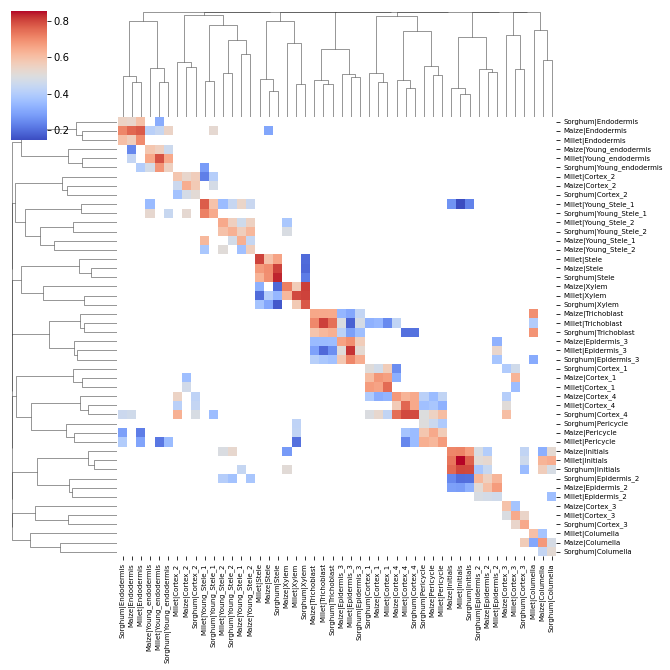

In [31]:

pymn.MetaNeighborUS(norm_data,
                    study_col='Species',
                    ct_col='Cell Cluster Annotation',
                    fast_version=True,
                    symmetric_output=False,
                    one_vs_best=True)

pymn.plotMetaNeighborUS(norm_data,
                        cmap='coolwarm',
                        figsize=(10, 10),
                        mn_key='MetaNeighborUS_1v1',
                        xticklabels=True,
                        yticklabels=True,
                        fontsize=7)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/plotting.py:487: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  es = best_hits.lookup(c, r)
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/plotting.py:518: UserWarning: pygraphviz is not installed, defaulting to networkx spring layout, for better layout install pygraphviz
  warnings.warn("pygraphviz is not installed, defaulting to networkx spring layout, for better layout install pygraphviz")


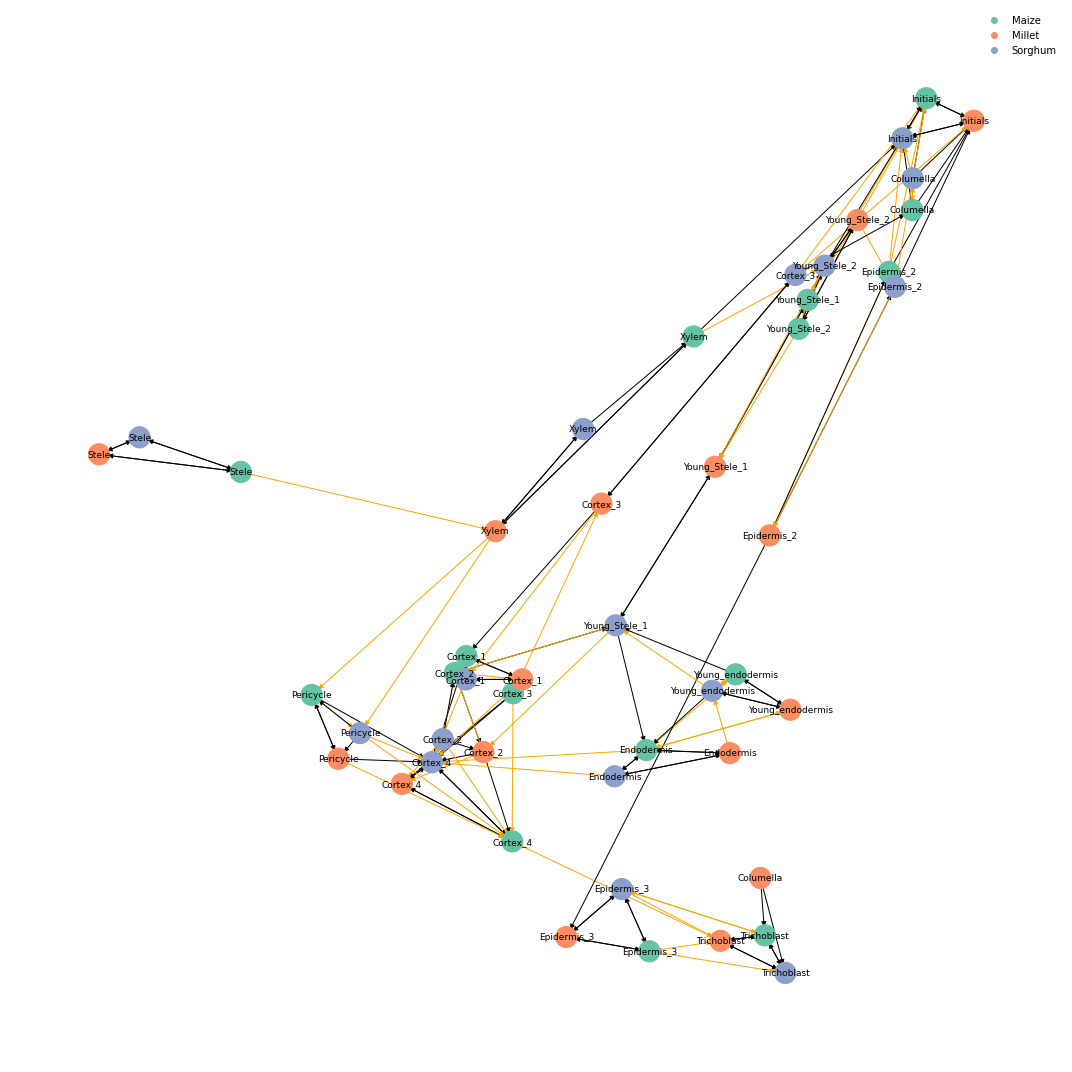

In [32]:
pymn.makeClusterGraph(norm_data,low_threshold= .4)
pymn.plotClusterGraph(norm_data, font_size=9,figsize=(15,15))

In [33]:
merged_tech = norm_data.uns['MetaNeighborUS']

In [34]:
merged_tech.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/merged_technology_type_heatmap.csv')

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


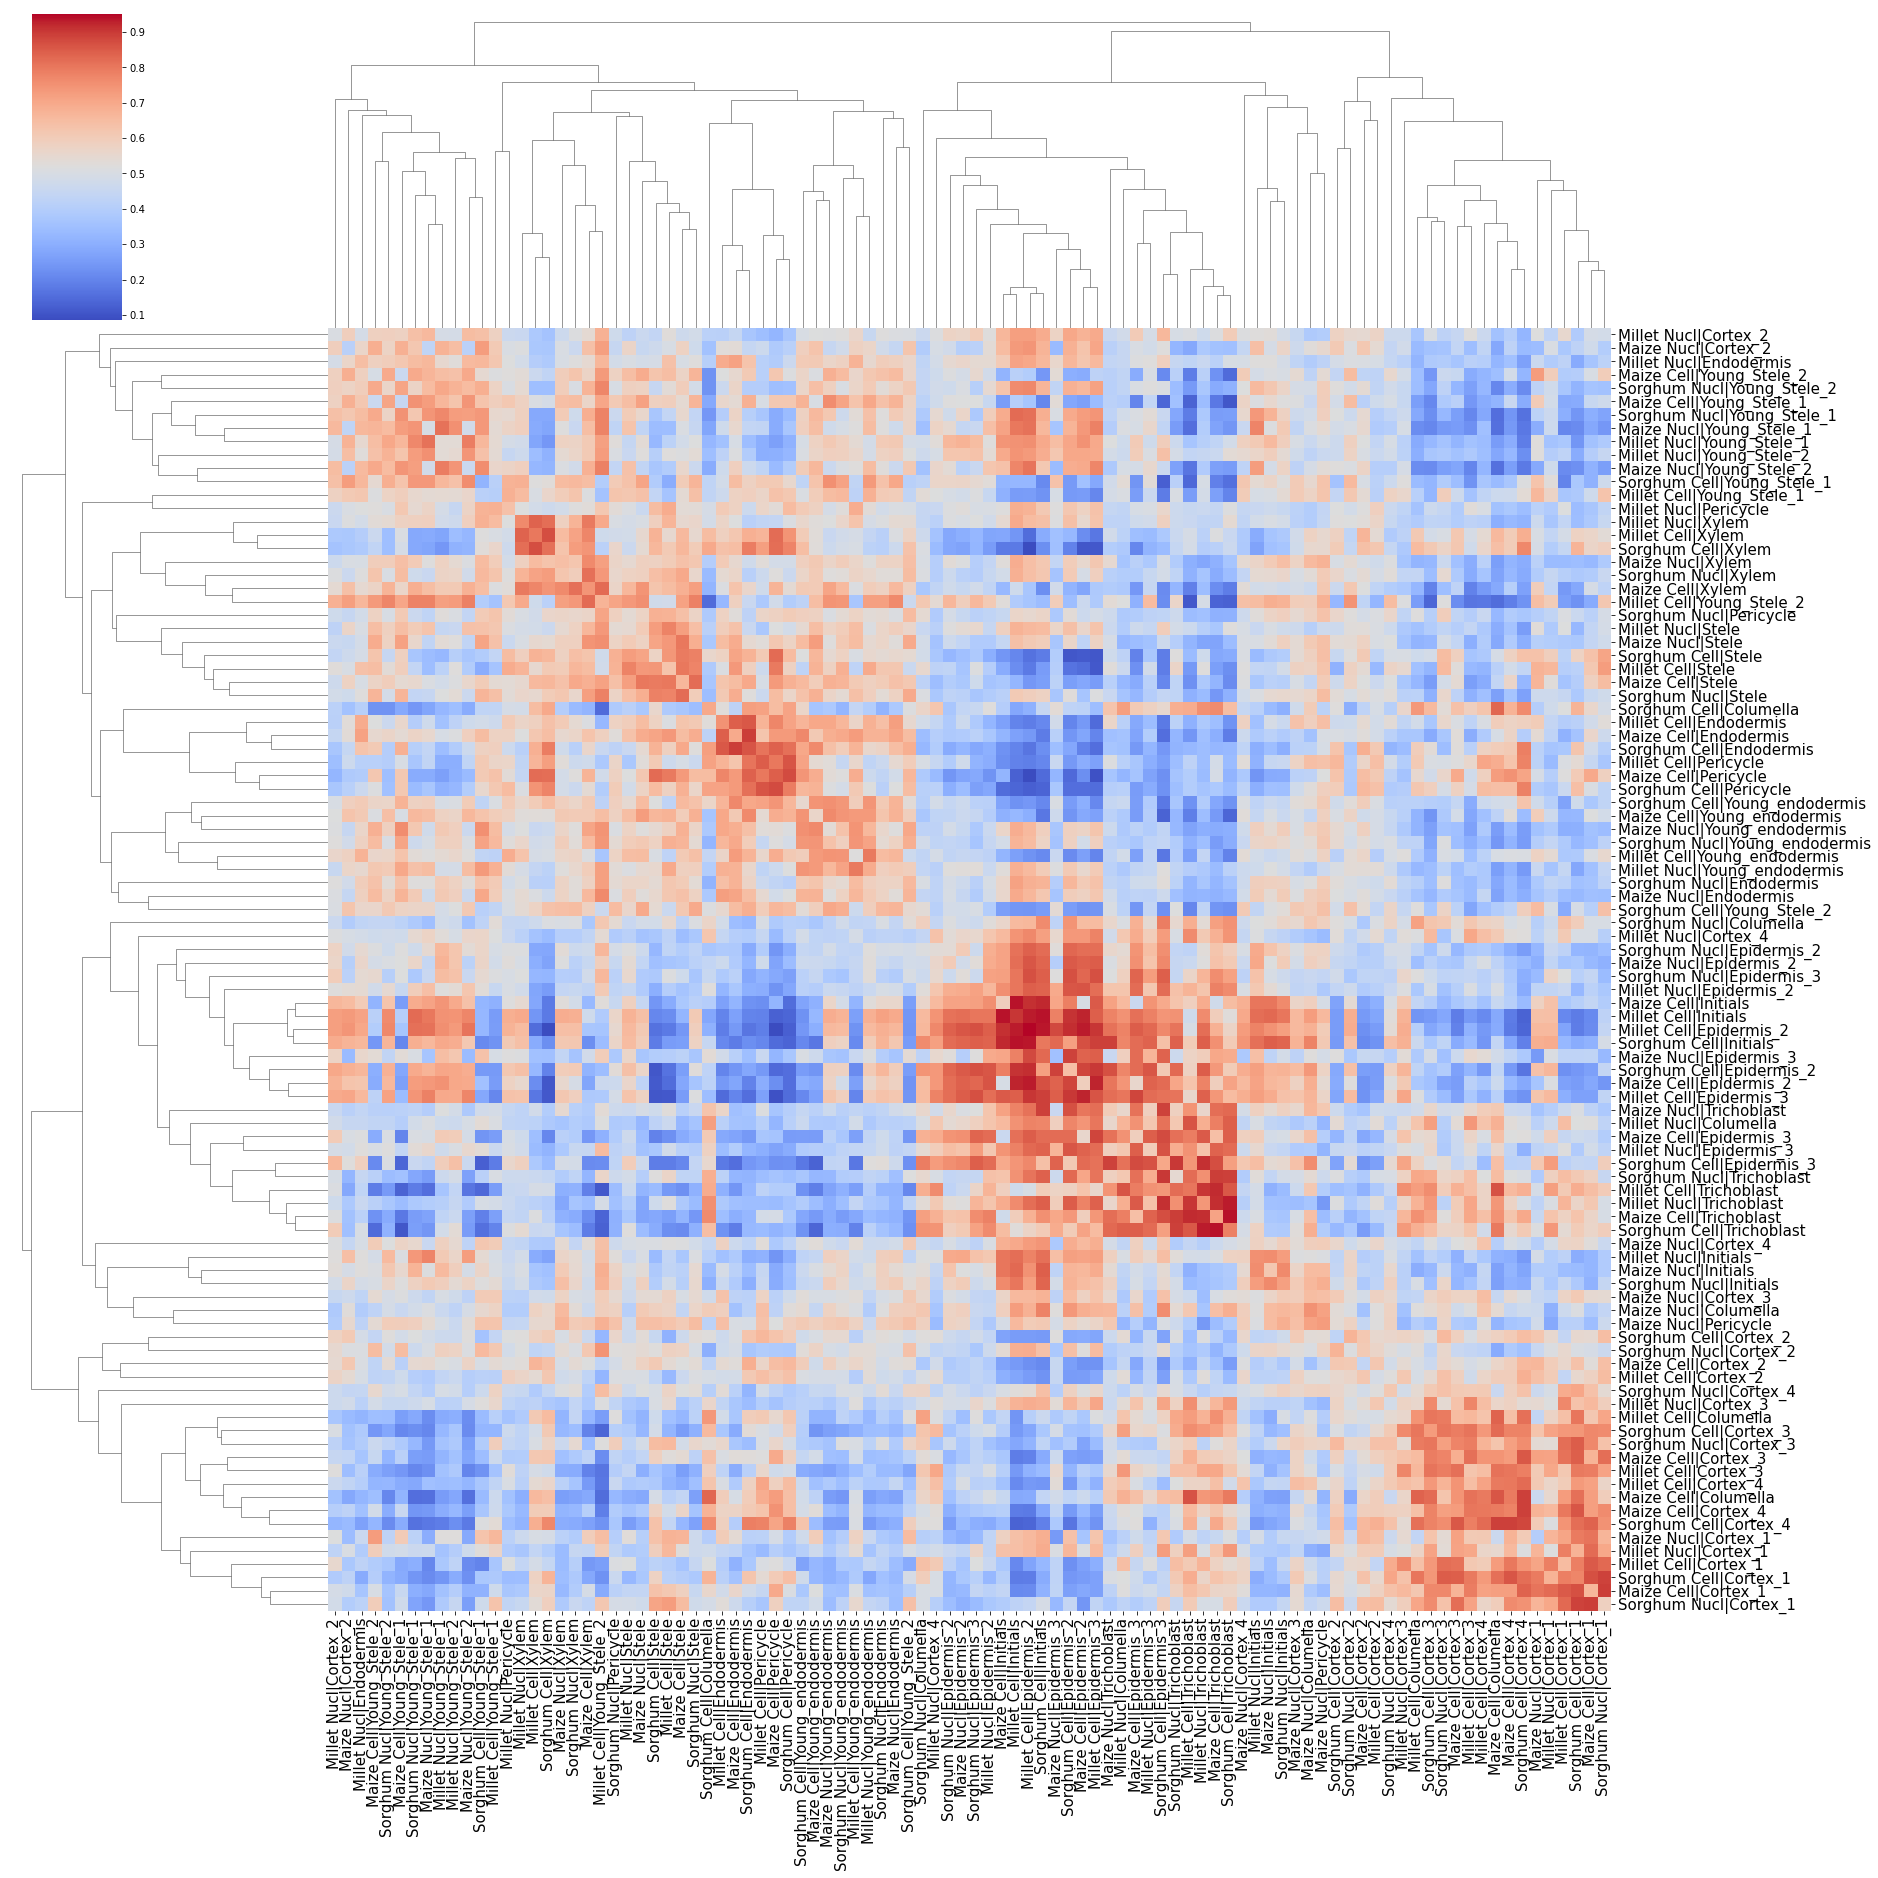

In [37]:
pymn.variableGenes(fully_seperated_data,study_col = 'Type and Species')
pymn.MetaNeighborUS(fully_seperated_data,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(fully_seperated_data,figsize = (25,25),cmap = 'coolwarm',fontsize = 15,show = False, cbar_pos = (0.02,0.82,0.05,0.17))
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/all_across_species_seperated_by_type.pdf', dpi = 1000)

In [36]:
pymn.variableGenes(fully_seperated_data,study_col = 'Type and Species')
pymn.MetaNeighborUS(fully_seperated_data,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(fully_seperated_data,figsize = (25,25),cmap = 'BrBG_r',fontsize = 15,show = False,cbar_pos = (0.02,0.82,0.05,0.17))
#g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/brown_blue_Green_version_all_across_species_seperated_by_type.png',dpi = 1000)
#cbar_pos = (22,5,1,3

KeyboardInterrupt: 

In [ ]:
seperated_by_cell_type = fully_seperated_data.uns['MetaNeighborUS']
seperated_by_cell_type

,Maize Cell|Columella,Maize Cell|Cortex_1,Maize Cell|Cortex_2,Maize Cell|Cortex_3,Maize Cell|Cortex_4,Maize Cell|Endodermis,Maize Cell|Epidermis_2,Maize Cell|Epidermis_3,Maize Cell|Initials,Maize Cell|Pericycle,...,Sorghum Nucl|Epidermis_2,Sorghum Nucl|Epidermis_3,Sorghum Nucl|Initials,Sorghum Nucl|Pericycle,Sorghum Nucl|Stele,Sorghum Nucl|Trichoblast,Sorghum Nucl|Xylem,Sorghum Nucl|Young_Stele_1,Sorghum Nucl|Young_Stele_2,Sorghum Nucl|Young_endodermis
Maize Cell|Columella,0.858635,0.723901,0.563876,0.747459,0.792916,0.496805,0.465749,0.637448,0.451723,0.725934,...,0.355385,0.456722,0.264416,0.325624,0.264335,0.649086,0.269512,0.154438,0.204109,0.242289
Maize Cell|Cortex_1,0.723901,0.665436,0.530174,0.673129,0.721331,0.559250,0.283853,0.463263,0.439430,0.699132,...,0.317119,0.441765,0.309226,0.418758,0.451230,0.579930,0.394643,0.300037,0.363216,0.352353
Maize Cell|Cortex_2,0.563876,0.530174,0.437636,0.537557,0.591606,0.526443,0.232055,0.281588,0.269375,0.644078,...,0.387114,0.432144,0.385597,0.489920,0.536936,0.388929,0.539849,0.545300,0.538502,0.537229
Maize Cell|Cortex_3,0.747459,0.673129,0.537557,0.686393,0.730495,0.528750,0.255545,0.462624,0.373428,0.695351,...,0.326590,0.436623,0.319178,0.435490,0.424267,0.580460,0.387039,0.258927,0.321620,0.344857
Maize Cell|Cortex_4,0.792916,0.721331,0.591606,0.730495,0.778348,0.570302,0.329295,0.516159,0.407728,0.749947,...,0.300755,0.384721,0.305817,0.395218,0.365017,0.517507,0.326681,0.240074,0.294954,0.312864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sorghum Nucl|Trichoblast,0.649086,0.579930,0.388929,0.580460,0.517507,0.320167,0.705728,0.812611,0.628125,0.365679,...,0.437806,0.446476,0.484383,0.468875,0.430203,0.545385,0.431653,0.279381,0.339784,0.395931
Sorghum Nucl|Xylem,0.269512,0.394643,0.539849,0.387039,0.326681,0.565272,0.492018,0.396894,0.483262,0.521616,...,0.465269,0.400342,0.560684,0.555680,0.556240,0.431653,0.593263,0.472485,0.504264,0.529003
Sorghum Nucl|Young_Stele_1,0.154438,0.300037,0.545300,0.258927,0.240074,0.571807,0.724739,0.506437,0.692516,0.292984,...,0.476422,0.379879,0.581088,0.460768,0.437958,0.279381,0.472485,0.616515,0.568883,0.469485
Sorghum Nucl|Young_Stele_2,0.204109,0.363216,0.538502,0.321620,0.294954,0.566006,0.661861,0.502499,0.629394,0.347784,...,0.471527,0.406864,0.565547,0.501085,0.487116,0.339784,0.504264,0.568883,0.564983,0.504154


In [ ]:
seperated_by_cell_type.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/seperated_by_tech_type.csv')

/home/passala/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


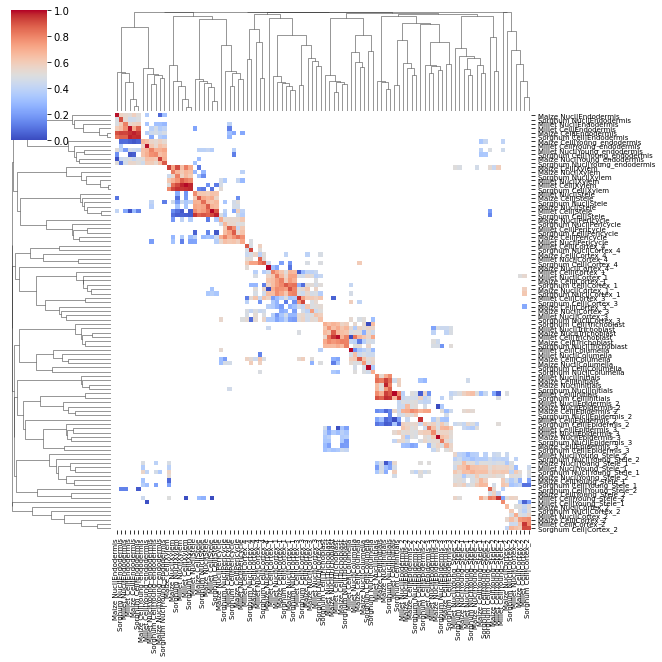

In [ ]:
pymn.MetaNeighborUS(fully_seperated_data,
                    study_col='Type and Species',
                    ct_col='Cell Cluster Annotation',
                    fast_version=True,
                    symmetric_output=False,
                    one_vs_best=True)

pymn.plotMetaNeighborUS(fully_seperated_data,
                        cmap='coolwarm',
                        figsize=(10, 10),
                        mn_key='MetaNeighborUS_1v1',
                        xticklabels=True,
                        yticklabels=True,
                        fontsize=7)

/home/passala/miniconda3/lib/python3.7/site-packages/pymn/plotting.py:487: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  es = best_hits.lookup(c, r)


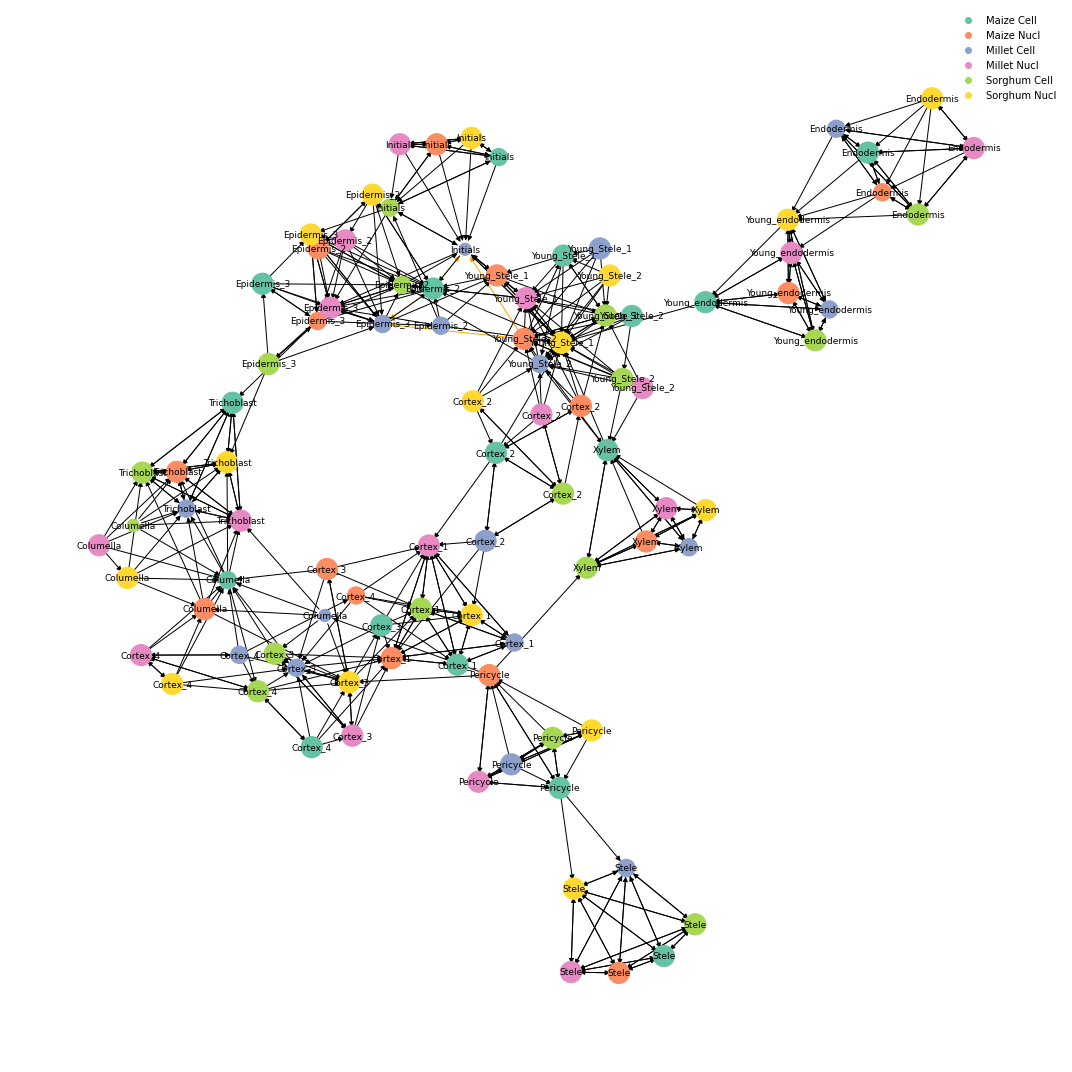

In [ ]:
pymn.makeClusterGraph(fully_seperated_data,low_threshold= .5)
pymn.plotClusterGraph(fully_seperated_data, font_size=9,figsize=(15,15))

In [ ]:
# list_of_highly_variable_genes = norm_data.var[norm_data.var['highly_variable']==True].index.tolist()
# list_of_highly_variable_genes_pd = pd.DataFrame(index = list_of_highly_variable_genes)
# list_of_highly_variable_genes_pd.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/list_of_highly_variable_genes.csv')